In [1]:
import pandas as pd
import numpy as np

# Import data

In [2]:
df = pd.read_csv("cleaned_scaled_df.csv")
df.head(10)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,0.325581,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.00,0.6,0.500000,1.0,0.0,0.666667,0.6,0.285714
1,0.0,0.0,0.0,0.0,0.151163,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.50,0.0,0.000000,0.0,0.0,0.500000,1.0,0.000000
2,0.0,1.0,1.0,1.0,0.186047,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.00,1.0,1.000000,1.0,0.0,0.666667,0.6,1.000000
3,0.0,1.0,0.0,1.0,0.174419,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.25,0.0,0.000000,0.0,0.0,0.833333,0.4,0.714286
4,0.0,1.0,1.0,1.0,0.139535,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.25,0.1,0.000000,0.0,0.0,0.833333,0.8,0.428571
5,0.0,1.0,1.0,1.0,0.151163,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.25,0.0,0.066667,0.0,1.0,0.750000,1.0,1.000000
6,0.0,1.0,0.0,1.0,0.209302,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.50,0.0,0.466667,0.0,0.0,0.666667,1.0,0.857143
7,0.0,1.0,1.0,1.0,0.151163,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.50,0.0,0.000000,1.0,0.0,0.833333,0.6,0.428571
8,1.0,1.0,1.0,1.0,0.209302,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.00,1.0,1.000000,1.0,0.0,0.666667,0.8,0.000000
9,0.0,0.0,0.0,1.0,0.139535,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.25,0.0,0.000000,0.0,1.0,0.583333,0.6,0.285714


There are 3 classes that are needed to be predicted: Diabetes_012 - 0.0, 0.5, 1.0

In [3]:
print(df[df['Diabetes_012'] == 1.0].count())
print(df['Diabetes_012'].count())

Diabetes_012            35346
HighBP                  35346
HighChol                35346
CholCheck               35346
BMI                     35346
Smoker                  35346
Stroke                  35346
HeartDiseaseorAttack    35346
PhysActivity            35346
Fruits                  35346
Veggies                 35346
HvyAlcoholConsump       35346
AnyHealthcare           35346
NoDocbcCost             35346
GenHlth                 35346
MentHlth                35346
PhysHlth                35346
DiffWalk                35346
Sex                     35346
Age                     35346
Education               35346
Income                  35346
dtype: int64
253680


# Training KNN classification model

In [4]:
from sklearn.model_selection import train_test_split

X, y = df.iloc[:,1:], df.iloc[:, 0].astype(int)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42)

In [5]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

## Accuracy check
and try to astimate train_test for best result

In [6]:
y_predicted = clf.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_predicted)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 83.49%


# Cross validation
with 3 blocks

In [7]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix

In [9]:
res = []
for cvv in range(2, 10):
    cv_results = cross_validate(clf, X, y, cv=cvv)
    sorted(cv_results.keys())
    res.append([cvv, np.array(cv_results['test_score']).mean()])

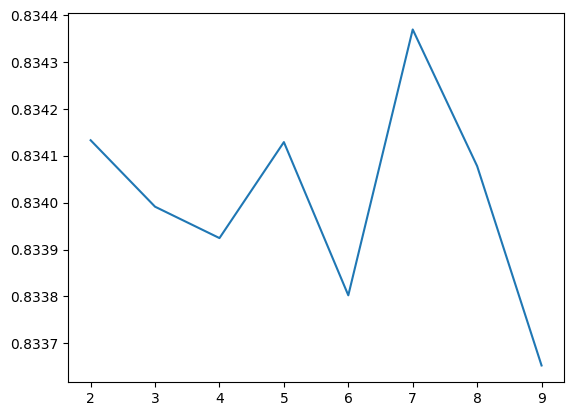

In [10]:
import matplotlib.pyplot as plt
import numpy as np

res = np.array(res)
plt.plot(res[:,0], res[:,1])

# Results
The KNN performed on this dataset with the task of identification 3 states on Diabetes for Questioned public with accuracy of 83.5 percent on a random sample 90/10 split.
Close result using cross validation with base k=7 - 83.44 percent.
